# U-spline Tutorial in Jupyter using the Julia language

In [73]:
using SymPy
using Plots
using PyPlot
plt = PyPlot

PyPlot

## Review of the Bernstein basis

The Bernstein basis functions are a set of basis functions that span the polynomial space. Just as the basis

$$
x^i \text{, }i\in{0...p}
$$

span the polynomial space of degree $p$, the Bernstein basis functions of degree $p$ also span the same space.

In general, the $i$-th Bernstein basis function of degree $p$ is defined as

$$
B_{i,p}(t) = \binom{p}{i} t^i (1-t)^{p-i}
$$

However, to provide some reasoning behind this definition, the following motivation for the construction of the Bernstein basis is helpful.

We may begin with the idea that these functions form a partition of unity, which means the sum of the functions equals 1.

$$
\sum_i f_i = 1
$$

The simplest set of functions that has partition of unity is the function $f(t)=1$.
If we wanted to introduce some variation as a function of $t$, we must ensure that no matter what value $t$ has, the total sum still equals $1$.  One way to do this is

$$
(1-t)+t
$$

If we raise this expression to a power of $p$, the property of partition of unity continues to be true. Thus we have

$$
((1-t)+t)^p
$$

Now, suppose we expand this expression for a given value of $p$.  If $p=0$, we have

$$
1
$$

If $p=1$ we have

$$
(1-t)+t
$$

If $p=2$ we have

$$
(1 - t)^2 + 2 (1 - t) t + t^2
$$

If $p=3$ we have

$$
(1 - t)^3 + 3 (1 - t)^2 t + 3 (1 - t) t^2 + t^3
$$

For a given value of $p$, the $i$-th Bernstein basis function is the $i$-th term in these expanded expressions.
Thus, for $p=3$, the Bernstein basis functions are

$$
(1 - t)^3
$$

$$
3 (1 - t)^2 t
$$

$$
3 (1 - t) t^2
$$

$$
t^3
$$



# Plotting the Bernstein basis

What do these Bernstein functions look like? We can plot them using Julia.

First, we can build the Bernstein basis of degree $p$ using some symbolic manipulation using the library SymPy.  Note: A great simple example of using SymPy can be found here: https://nbviewer.jupyter.org/github/sylvaticus/juliatutorial/blob/master/assets/Symbolic%20computation.ipynb

This first example is for quadratic ($p=2$) Bernstein basis functions.  The reader may change the value of $p$ and re-run the next few cells to see the result for other degrees.

In [74]:
module BuildBernBasisEx
    using SymPy
end

Main.BuildBernBasisEx

In [75]:
@eval BuildBernBasisEx begin

    # Define the variables
    a,b,t = SymPy.symbols("a,b,t", real=true)

    # Set the degree
    p = 2

    # Create the first expression (with 'a' and 'b' substituted
    # in for (1-t) and t, which we will put back in later)
    expr1 = (a+b)^p
end

       2
(a + b) 

In [76]:
@eval BuildBernBasisEx begin
    expr2 = SymPy.expand(expr1)
end

 2            2
a  + 2⋅a⋅b + b 

In [77]:
@eval BuildBernBasisEx begin
    expr3 = subs(expr2, a=>(1-t), b=>t)
end

 2                        2
t  + 2⋅t⋅(1 - t) + (1 - t) 

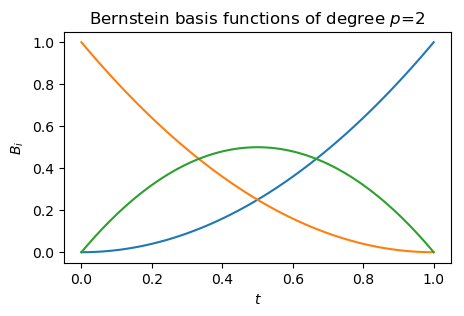

PyObject Text(26.4, 0.5, '$B_i$')

In [78]:
@eval BuildBernBasisEx begin
    using PyPlot
    plt = PyPlot

    # Grab each term in the expression
    B = Array{Any,1}()
    for j = 1:(p+1)
        push!( B, expr3.args[j] )
    end

    # Evaluate each term at all the points in 'x', going from 0 to 1
    h = 0.01
    x = collect(0:h:1)[:]
    BEvals = zeros(p+1,length(x))
    for i = 1:length(x)
        for j = 1:(p+1)
            BEvals[j,i] = subs(B[j], t=>x[i]).evalf()
        end
    end

    # Plot each function from 0 to 1
    figure_size = (5, 3)
    plt.figure(figsize=figure_size)
    for j = 1:(p+1)
        plt.plot(x,BEvals[j,:])
    end

    plt.title("Bernstein basis functions of degree \$p\$="*string(p))
    plt.xlabel("\$t\$")
    plt.ylabel("\$B_i\$")
end

More efficiently, a function that evaluates the $a$-th Bernstein basis of degree $p$ may be defined as follows.

In [79]:
"""
function bernstein_basis(a::Int64,
                        p::Int64,
                        t::Float64;
                        dmin::Float64=0.,
                        dmax::Float64=1.)::Union{Float64,ComplexF64}

============================
# Parameters
* a: The function index
* p: The polynomial degree
* t: The parameter value where the basis function is to be evaluated

# Named Parameters
* dmin: The minimum value of the domain
* dmax: The maximum value of the domain
"""
function bernstein_basis(a::Int64,
                        p::Int64,
                        t::Union{Float64,ComplexF64};
                        dmin::Float64=0.,
                        dmax::Float64=1.)::Union{Float64,ComplexF64}
    if(a < 1 || a > p+1 || real(t) < dmin || real(t) > dmax)
        return 0.0
    end
    tmapped = (t - dmin)/(dmax-dmin)
    result = binomial(p,a-1) * tmapped^(a-1) * (1.0-tmapped)^(p-(a-1))
    return result
end

bernstein_basis

One more example of plotting the Bernstein basis, using the more efficient implementation:

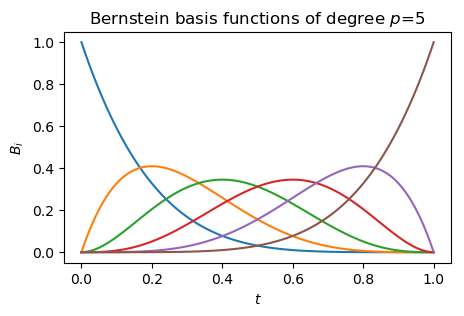

PyObject Text(26.4, 0.5, '$B_i$')

In [80]:
let
    # Evaluate each term at all the points in 'x', going from 0 to 1
    h = 0.01
    p = 5
    x = collect(0:h:1)[:]
    BEvals = zeros(p+1,length(x))
    for i = 1:length(x)
        for j = 1:(p+1)
            BEvals[j,i] = bernstein_basis(j,p,x[i])
        end
    end

    # Plot each function from 0 to 1
    figure_size = (5, 3)
    plt.figure(figsize=figure_size)
    for j = 1:(p+1)
        plt.plot(x,BEvals[j,:])
    end
    plt.title("Bernstein basis functions of degree \$p\$="*string(p))
    plt.xlabel("\$t\$")
    plt.ylabel("\$B_i\$")
end

# Bezier curves

A Bezier curve is a polynomial curve drawn in (typically) 2D or 3D space, by summing the product of a set of coefficients in spatial coordinates with the set of Bernstein bases.  These coefficients are called *control points*.

$$
\boldsymbol{X}(t) = \sum_i \boldsymbol{P}_i B_i(t)
$$

where the control point $\boldsymbol{P}_i$ is two or three dimensional vector specifying a point in space.

For example, suppose we wanted to draw a cubic Bezier curve on a 2D plane.  We may select the following points:

$$
\boldsymbol{P}_1 = \begin{bmatrix}
           0.0 \\
           0.0 \\
         \end{bmatrix}\hspace{1mm}
\boldsymbol{P}_2 = \begin{bmatrix}
           1.0 \\
           0.5 \\
         \end{bmatrix}\hspace{1mm}
\boldsymbol{P}_3 = \begin{bmatrix}
           0.5 \\
           1.5 \\
         \end{bmatrix}\hspace{1mm}
\boldsymbol{P}_4 = \begin{bmatrix}
           2.0 \\
           2.0 \\
         \end{bmatrix}
$$

Then, we draw the curve by evaluating the following equation

$$
\boldsymbol{X}(t) = \boldsymbol{P}_1 B_1(t) + \boldsymbol{P}_2 B_2(t)  + \boldsymbol{P}_3 B_3(t)  + \boldsymbol{P}_4 B_4(t) 
$$

In Julia, we can draw it this way:

In [81]:

"""
function draw_bezier_curve(
                        P::Array{Float64,2},
                       t::Array{Float64})::Array{Float64,2}
============================
# Parameters
* P: Positions of the control points (dim_s-by-(p+1) matrix)
* t: Array of values t between 0 and 1

# Returns
* Matrix of dimension dim_s-by-n, containing the positions of the curve at each value t.
"""
function draw_bezier_curve(
                    P::Array{Float64,2},
                    t::Array{Float64})::Array{Float64,2}

    # The spatial dimension
    dim_s = size(P)[1]
    
    # The degree of the curve
    p = size(P)[2]-1

    # Compute the curve position for each value of t.
    X = zeros(dim_s,length(t))
    for i = 1:length(t)
        for d = 1:dim_s
            X[d,i] = 0.0
            for k = 1:(p+1)
                X[d,i] += P[d,k] * bernstein_basis(k,p,t[i])
            end
        end
    end
    
    # Return the result.
    return X
end


"""
function draw_bezier_curve(
                        P::Array{Float64,2},
                        n::Int64)
============================
# Parameters
* P: Positions of the control points (dim_s-by-(p+1) matrix)
* n: The number of points (a.k.a. h = 1/n)

# Returns
* Tuple containing
    Matrix of dimension dim_s-by-n, containing the positions of the curve at each value t.
    Array containing each value t.
"""
function draw_bezier_curve(
                    P::Array{Float64,2},
                    n::Int64)::Tuple{Array{Float64,2},Array{Float64}}
  
    # Generate each value of t
    h = 1.0/n
    t = collect(0:h:1)[:]
    
    # Compute the curve position for each value of t.
    result = draw_bezier_curve( P, t )
    
    # Return the result.
    return result, t;
end

draw_bezier_curve

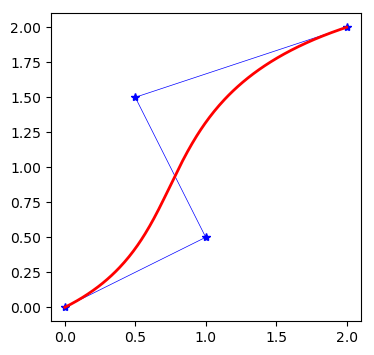

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd72b6e7828>

In [82]:
#using PyPlot
#plt = PyPlot

let
    # Cubic bezier curve
    p = 3

    # The spatial dimension
    dim_s = 2

    # The control points
    P = Array{Float64,2}([
            0.0 1.0 0.5 2.0
            0.0 0.5 1.5 2.0 ])

    X,t = draw_bezier_curve( P, 200 )

    # Draw the curve
    figure_size = (4, 4)
    plt.figure(figsize=figure_size)
    plt.plot(P[1,:],P[2,:],"-*",color="b",linewidth=0.5)
    plt.plot(X[1,:],X[2,:],"-",color="r",linewidth=2)
end

The control points are in blue, and the Bezier curve is in red.  The thin lines between the control points is sometimes referred to as the *control mesh*.

# De Casteljau's algorithm

An intuitive geometric algorithm for constructing a Bezier curve from a set of control points is de Casteljau's algorithm.

De Casteljau's algorithm begins with the control mesh - lines connecting the control points, forming a mesh. Along each line, a new point is created a fractional distance along the line determined by the parameter $t \in (0,1)$.  Then, new lines are drawn between these new points, and the process is repeated until there is only one point left.  This point lies on the Bezier curve.

An example will make this clear.

In [83]:
# using Plots

# Using the GR backend in Plots.
Plots.gr()

Plots.GRBackend()

## Drawing the lines for de Casteljau's algorithm

Here we use Julia to define a couple functions which help draw the lines and points at each step of de Casteljau's algorithm

In [84]:
"""
function decasteljau_lines_at_t(
                        t::Float64,
                        P::Array{Float64,2} )::Array{Array{Float64,2}}
============================
# Parameters
* t: The parameter value
* P: Positions of the control points (dim_s-by-n matrix)

# Returns
* Array of matrices, one matrix for each de-casteljau algorithm step,
  containing the endpoints of the lines.
"""
function decasteljau_lines_at_t(
                        t::Float64,
                        P::Array{Float64,2} )::Array{Array{Float64,2}}
   
    # The results are stored here.
    result = Array{Array{Float64,2},1}()
 
    # The spatial dimension
    dim_s = size(P)[1]
    
    # Collect the points for each de-casteljau algorithm step
    n = size(P)[2]-1
    step = 0
    while( n > 0 )
        newpoints = zeros(dim_s,n)
        prevpoints = nothing
        if( step == 0 )
            prevpoints = P
        else
            prevpoints = result[step]     
        end
        for i = 1:n
            newpoints[:,i] = prevpoints[:,i] + t * (prevpoints[:,i+1] - prevpoints[:,i])
        end
        push!(result,newpoints)
        step += 1
        n -= 1
    end
    
    # Return the result
    return result;
end

decasteljau_lines_at_t

Next, we show that we can draw these lines for a particular parameter value $t = 0.33$

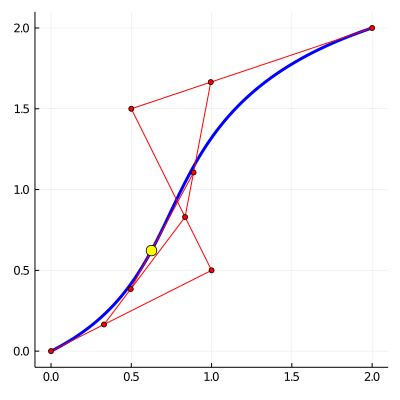

In [85]:
let
    # Cubic bezier curve
    p = 3

    # The spatial dimension
    dim_s = 2

    # The control points
    P = Array{Float64,2}([
            0.0 1.0 0.5 2.0
            0.0 0.5 1.5 2.0 ])

    # Compute the curve position at each value of t.
    X,t = draw_bezier_curve( P, 200 )

    # Determine the min and max of the area to be plotted.
    pxmin = minimum(P[1,:])
    pxmax = maximum(P[1,:])
    pymin = minimum(P[2,:])
    pymax = maximum(P[2,:])
    offsetx = (pxmax-pxmin)*0.05
    offsety = (pxmax-pxmin)*0.05
    plotxmin = pxmin - offsetx
    plotxmax = pxmax + offsetx
    plotymin = pymin - offsety
    plotymax = pymax + offsety

    # Plot the curve
    Plots.default(overwrite_figure=true)
    fig = Plots.plot()
    Plots.plot!( fig, X[1,:], X[2,:],
                leg = false,
                xlims = (-0.1, 2.1),
                ylims = (-0.1, 2.1),
                size= (400,400),
                lw=3,
                linecolor=:blue )

    # Plot the control points.
    Plots.plot!( fig, P[1,:], P[2,:],
                leg = false,
                xlims = (plotxmin, plotxmax),
                ylims = (plotymin, plotymax),
                size= (400,400),
                lw=1,
                linecolor=:red )
    Plots.scatter!( fig, P[1,:], P[2,:],
                leg = false,
                xlims = (plotxmin, plotxmax),
                ylims = (plotymin, plotymax),
                size= (400,400),
                markersize=3,
                markercolor=:red )

    # Pick a t-value
    tval = 0.33

    # Collect the decasteljau lines at an arbitrary t value.
    DCL = decasteljau_lines_at_t( tval, P )::Array{Array{Float64,2}}
    for i = 1:length(DCL)
        dcjl = DCL[i]
        Plots.plot!( fig, dcjl[1,:], dcjl[2,:],
                    leg = false,
                    xlims = (plotxmin, plotxmax),
                    ylims = (plotymin, plotymax),
                    size= (400,400),
                    lw=1,
                    linecolor=:red )
        if i == length(DCL)
            Plots.scatter!( fig, dcjl[1,:], dcjl[2,:],
                            leg = false,
                            xlims = (plotxmin, plotxmax),
                            ylims = (plotymin, plotymax),
                            size= (400,400),
                            markersize=6,
                            markercolor=:yellow )
        else
            Plots.scatter!( fig, dcjl[1,:], dcjl[2,:],
                            leg = false,
                            xlims = (plotxmin, plotxmax),
                            ylims = (plotymin, plotymax),
                            size= (400,400),
                            markersize=3,
                            markercolor=:red )
        end
    end

    display(fig)
end

Finally, we can create an animation that intuatively shows how de Casteljau's algorithm draws a Bezier curve.  The reader may adjust the values of the control points, or the degree, to see various curves and get an intuition for how the algorithm works.  Hint: Try setting $p=4$ and the control points to $(0,0)$, $(0.25,1)$, $(0.5,0)$, $(0.75,0)$, and $(1,0)$.

┌ Info: Saved animation to 
│   fn = /Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_bezier_curve_with_decasteljau_00.gif
└ @ Plots /Users/stevenschmidt/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_bezier_curve_with_decasteljau_00.gif")
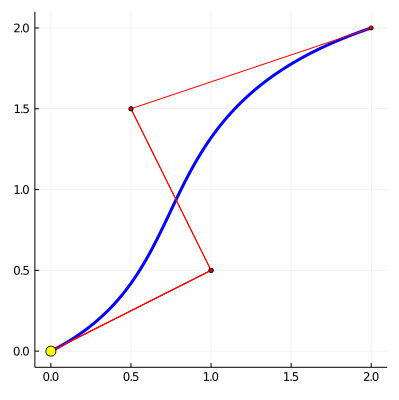

In [86]:
let
    # Cubic bezier curve
    p = 3

    # The spatial dimension
    dim_s = 2

    # The control points
    P = Array{Float64,2}([
            0.0 1.0 0.5 2.0
            0.0 0.5 1.5 2.0 ])

    # Compute the curve position at each value of t.
    X,t = draw_bezier_curve( P, 200 )

    # Determine the min and max of the area to be plotted.
    pxmin = minimum(P[1,:])
    pxmax = maximum(P[1,:])
    pymin = minimum(P[2,:])
    pymax = maximum(P[2,:])
    offsetx = (pxmax-pxmin)*0.05
    offsety = (pxmax-pxmin)*0.05
    plotxmin = pxmin - offsetx
    plotxmax = pxmax + offsetx
    plotymin = pymin - offsety
    plotymax = pymax + offsety

    anim = Animation()
    for tval = range(0, stop = 1, length = 100)

        # Draw the curve
        Plots.default(overwrite_figure=true)
        fig = Plots.plot()
        Plots.plot!( fig, X[1,:], X[2,:],
                    leg = false,
                    xlims = (plotxmin, plotxmax),
                    ylims = (plotymin, plotymax),
                    size= (400,400),
                    lw=3,
                    linecolor=:blue )

        # Plot the control points.
        Plots.plot!( fig, P[1,:], P[2,:],
                    leg = false,
                    xlims = (plotxmin, plotxmax),
                    ylims = (plotymin, plotymax),
                    size= (400,400),
                    lw=1,
                    linecolor=:red )
        Plots.scatter!( fig, P[1,:], P[2,:],
                    leg = false,
                    xlims = (plotxmin, plotxmax),
                    ylims = (plotymin, plotymax),
                    size= (400,400),
                    markersize=3,
                    markercolor=:red )

        # Collect the decasteljau lines at an arbitrary t value.
        DCL = decasteljau_lines_at_t( tval, P )::Array{Array{Float64,2}}
        for i = 1:length(DCL)
            dcjl = DCL[i]
            Plots.plot!( fig, dcjl[1,:], dcjl[2,:],
                        leg = false,
                        xlims = (-plotxmin, plotxmax),
                        ylims = (-plotymin, plotymax),
                        size= (400,400),
                        lw=1,
                        linecolor=:red )
            if i == length(DCL)
                Plots.scatter!( fig, dcjl[1,:], dcjl[2,:],
                                leg = false,
                                xlims = (plotxmin, plotxmax),
                                ylims = (plotymin, plotymax),
                                size= (400,400),
                                markersize=6,
                                markercolor=:yellow )
            else
                Plots.scatter!( fig, dcjl[1,:], dcjl[2,:],
                                leg = false,
                                xlims = (plotxmin, plotxmax),
                                ylims = (plotymin, plotymax),
                                size= (400,400),
                                markersize=3,
                                markercolor=:red )
            end
        end

        frame(anim)
    end
    gif(anim, "fig_bezier_curve_with_decasteljau_00.gif", fps = 15)
end

# B-splines:  Connected sequences of Bezier curves

In concept, B-splines are a connected squence of one or more Bezier curves, with the additional constraint that a certain continuity is enforced at the connection points.  An algorithm called *de Boor's algorithm*, which is in many ways a generalization of de Casteljau's algorithm, defines a B-spline from a given *degree* and a given sequence of numbers called a *knot vector*.   Under this definition, B-splines are restricted such that all the connected Bezier curves must be the same degree.  This restriction will be lifted later when we introduce one-dimensional U-splines.

## Summary of de Boor's algorithm

De Boor's algorithm is used to construct a set of $n$ basis functions which span all the Bezier curves that make up the B-spline, and together ensure the required continuity is maintained between the Bezier curves.  This algorithm assumes it has been provided a degree $p$ and a knot vector $\boldsymbol{k}$ containing a sequence of $n+p-1$ non-decreasing values.  These values may repeat or increase, but not decrease.

A couple things to be aware of:

* Since we are using Julia, which uses 1-based indexing, the definition below assumes that the values of the knot vector are indexed $1...n+p-1$.
* De Boor's algorithm sometimes requests indices into the knot vector which are below or above the vector's index-range.  In this case, a repeated value of the lowest or highest knot value is returned.

Given a degree $p$ and a knot vector $\boldsymbol{k}$ with values $k_i, i = 1...n+p-1$, a set of basis functions $N_{i,p}, i = 1...n$ are defined recursively as follows.

\begin{equation}
N_{i,0}(t) =
	\begin{cases}
    	1 \text{ if } k_{i-1} \le t \le k_{i} \\[0.1em]
        0 \text{ otherwise }
    \end{cases}
\end{equation}

\begin{equation}
N_{i,p}(t) = \frac{t-k_{i-1}}{k_{i+p-1}-k_{i-1}} N_{i,p-1}(t) + \frac{k_{i+p}-t}{k_{i+p}-k_{i}}N_{i+1,p-1}(t)
\end{equation}

If provided with a set of control points $\boldsymbol{P}_i$, a B-spline curve of degree $p$ with knot vector $\boldsymbol{k}$ is determined by evaluating the following equation, given parameter $t \in [\min(\boldsymbol{k}),\max(\boldsymbol{k})]$.

\begin{equation}
\boldsymbol{P}(t) = \sum_i N_{i,p}(t) \boldsymbol{P}_i
\end{equation}


Let's jump in and implement this definition in Julia, and see what these basis functions look like for a few example knot vectors.

In [87]:
"""
function knot_at_index(
                    knot_v::Array{Float64},
                    i::Int64)::Float64
=======
Returns the knot at index i, or
if i < 1, then returns knot_v[1]
if i > length(knot_v), then returns knot_v[end]

# Parameters:
* knot_v: The knot vector
* i: The desired index
"""
function knot_at_index(
                    knot_v::Array{Float64},
                    i::Int64)::Float64
    if(i < 1)
        return knot_v[1]
    elseif(i > length(knot_v))
        return knot_v[end]
    end
    return knot_v[i]
end


"""
function b_spline_basis(
                    i::Int64,
                    p::Int64,
                    knot_v::Array{Float64},
                    t::Union{Float64,ComplexF64})::Union{Float64,ComplexF64}
=========
# Parameters:
* i: knot index (1-indexed)
* p: The degree of the curve
* knot_v: The knot vector (Array of Float64)
* t: The parameter value where the basis function is evaluated
"""
function b_spline_basis(
                    i::Int64,
                    p::Int64,
                    knot_v::Array{Float64},
                    t::Union{Float64,ComplexF64})::Union{Float64,ComplexF64}
    
    tol = 1e-14::Float64
    result = 0.0
    if( p >= 0 )
        if( p == 0 )
            result += convert( Int64, ( real(t) >= knot_at_index(knot_v,i-1) ) && ( real(t) < knot_at_index(knot_v,i) ) )
            return result
        else
            denominator_1 = knot_at_index(knot_v,i+p-1) - knot_at_index(knot_v,i-1)
            if( abs(denominator_1) > tol )
                result += ((t - knot_at_index(knot_v,i-1)) / denominator_1 ) * b_spline_basis(i, p-1, knot_v, t)
            end

            denominator_2 = knot_at_index(knot_v,i+p) - knot_at_index(knot_v,i)
            if( abs(denominator_2) > tol )
                result += ( (knot_at_index(knot_v,i+p) - t) / denominator_2 ) * b_spline_basis(i+1, p-1, knot_v, t)
            end

            return result
        end
    else
        return result
    end
end

b_spline_basis

First, let's look at the basis functions of a cubic B-spline which is equivalent to a cubic Bezier curve (thus, the basis functions are equivalent to the Bernstein basis).  To do so, we select $p=3$ and provide the knot vector
$$
    \boldsymbol{k} = \begin{matrix}
           0 \; 0 \; 0 \; 1 \; 1 \; 1 \; \\
         \end{matrix}\hspace{1mm}
$$

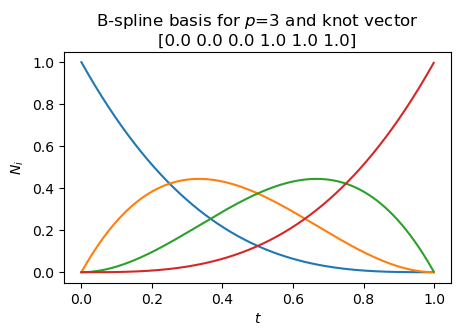

PyObject Text(26.4, 0.5, '$N_i$')

In [88]:
#using PyPlot
#plt = PyPlot

let
    knotv = Array{Float64}([ 0 0 0 1 1 1 ])
    p = 3
    h = 0.001
    t = collect(0:h:maximum(knotv)-h)[:]
    N = zeros( length(knotv)-p+1, length(t) )
    for j = 1:size(N)[1]
        for i = 1:length(t)
            N[j,i] = b_spline_basis(j,p,knotv,t[i])
        end
    end

    figure_size = (5, 3)
    plt.figure(figsize=figure_size)
    for j = 1:size(N)[1]
       plt.plot(t, N[j,:] )
    end
    plt.title("B-spline basis for \$p\$="*string(p)*" and knot vector\n"*string(knotv))
    plt.xlabel("\$t\$")
    plt.ylabel("\$N_i\$")
end

## Notes about knot vectors

There are several things that are important to know about how to read knot vectors.  I list them here in no particular order.  Each of these things helps recognize how a B-spline will look and behave, just by examining the knot vector.

* The knots of the knot vector may be grouped into all possible contiguous sequences of $p$ knots. Each grouping corresponds to a basis function (and/or control point).  For example, the knot vector $0 0 0 1 1 1$ results in the following groupings:
$$
    0 0 0
$$
$$
    0 0 1
$$
$$
    0 1 1
$$
$$
    1 1 1
$$
These groupings are called *polar coordinates*.

* The parameter-space of the B-spline extends from the smallest-valued knot to the largest-valued knot.  For example, a quadratic B-spline with the knot vector $0 0 1 2 3 3$ is parameterized $t \in (0,3)$.

* The span of each Bezier curve in the B-spline may be identified by looking at the list of unique knots.  For example, a quadratic ($p=2$) B-spline with knot vector $0 0 1 2 3 3$ contains three Bezier curves: the first that extends from $t \in (0,1)$, the next that extends from $t \in (1,2)$, and the third that extends from $t \in (2,3)$.
         
* The continuity of a B-spline at the interfaces between Bezier curves may be determined by looking at the multiplicity of each knot (a.k.a. the number of times a knot value is found in the knot vector).  If the knot has multiplicity $m$, the continuity at the interface is $C^{p-m}$.  For example, consider a cubic ($p=3$) B-spline with knot vector $0 0 0 1 1 1 2 2 3 4 4 4$.  This B-spline consists of four Bezier curves.  The interface between the first and second Bezier curves is at $t=1$, and the multiplicity of the knot with value $1$ is $m=3$, so we may see that the continuity at this interface is $C^{p-m}$, or $C^{0}$.  Similarlly, we can see that the continuities at the next two interfaces are $C^{1}$ and $C^{2}$.

In the charts below, we demonstrate the continuity changing as a result of changing the multiplicity of a knot.  We begin with knot vector $ 0 0 0 1 1 1 2 2 3 4 4 4 $, but then gradually shift the sixth knot from a value of $1$ to a value of $2$.  It is interesting to observe how the basis changes, as a result of changing this knot value.  At first, the continuity at $t=1$ is $C^0$ (consistent with knot $1$ having a multiplicity of $m=3$).  However, as the knot value changes, the multiplicity of $1$ becomes $m=2$, resulting in the continuity at $t=1$ to become $C^1$.  When the changing knot value becomes $2$, the multiplicity at $t=2$ becomes $m=3$, resulting in the continuity at $t=2$ to become $C^0$.

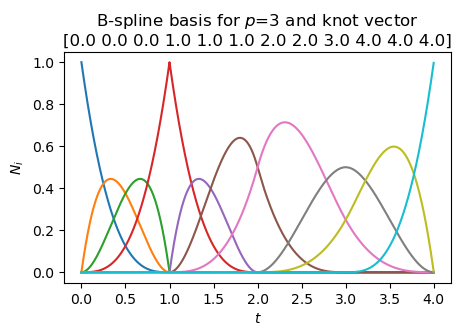

PyObject Text(26.4, 0.5, '$N_i$')

In [89]:
#using PyPlot
#plt = PyPlot

let
    knotv = Array{Float64}([ 0 0 0 1 1 1 2 2 3 4 4 4 ])
    p = 3
    h = 0.001
    t = collect(0:h:maximum(knotv)-h)[:]
    N = zeros( length(knotv)-p+1, length(t) )
    for j = 1:size(N)[1]
        for i = 1:length(t)
            N[j,i] = b_spline_basis(j,p,knotv,t[i])
        end
    end

    figure_size = (5, 3)
    plt.figure(figsize=figure_size)
    for j = 1:size(N)[1]
       plt.plot(t, N[j,:] )
    end
    plt.title("B-spline basis for \$p\$="*string(p)*" and knot vector\n"*string(knotv))
    plt.xlabel("\$t\$")
    plt.ylabel("\$N_i\$")
end

┌ Info: Saved animation to 
│   fn = /Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_b_spline_basis_shifting_knotval_00.gif
└ @ Plots /Users/stevenschmidt/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_b_spline_basis_shifting_knotval_00.gif")
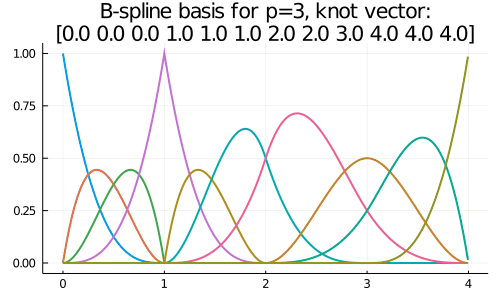

In [90]:
let
    # Collecting the values that the animation loops through
    ones_arr = 1.0.*ones(5)[:]
    twes_arr = 2.0.*ones(10)[:]
    vals_up = collect(1:0.01:2)[:]
    vals_down = collect(2:-0.01:1)[:]
    vals = cat(ones_arr, vals_up, twes_arr, vals_down, ones_arr,dims=(1))[:]

    # Creating the animation
    anim = Animation()
    for i = 1:length(vals)
        k6 = vals[i]
        knotv = Array{Float64}([ 0 0 0 1 1 k6 2 2 3 4 4 4 ])
        p = 3
        h = 0.005
        t = collect(0:h:maximum(knotv)-h)[:]
        N = zeros( length(knotv)-p+1, length(t) )
        for j = 1:size(N)[1]
            for i = 1:length(t)
                N[j,i] = b_spline_basis(j,p,knotv,t[i])
            end
        end

        offsetx = (maximum(t)-minimum(t))*0.05
        offsety = 0.05
        plotxmin = minimum(t) - offsetx
        plotxmax = maximum(t) + offsetx
        plotymin = 0.0 - offsety
        plotymax = 1.0 + offsety

        Plots.default(overwrite_figure=true)
        fig = Plots.plot()
        figtitle = "B-spline basis for p="*string(p)*", knot vector:\n"*string(knotv)*""
        for j = 1:size(N)[1]
            Plots.plot!( fig, t, N[j,:],
                    leg = false,
                    title = figtitle,
                    xlims = (plotxmin, plotxmax),
                    ylims = (plotymin, plotymax),
                    size= (500,300),
                    lw=2 )
        end

        frame(anim)
    end
    gif(anim, "fig_b_spline_basis_shifting_knotval_00.gif", fps = 30)
end

## Drawing a B-spline

In [91]:
"""
function draw_b_spline_curve(
                        p::Int64,
                        knot_v::Array{Float64},
                        P::Array{Float64,2},
                        t::Array{Float64})::Array{Float64,2}
============================
# Parameters
* p: The degree of the B-spline
* knot_v: The knot vector (length n+p-1, where n is the number of control points)
* P: Positions of the control points ((dim_s-by-n) matrix, where n is the number of control points)
* t: Array of values t between 0 and 1

# Returns
* Matrix of dimension dim_s-by-n, containing the positions of the curve at each value t.
"""
function draw_b_spline_curve(
                    p::Int64,
                    knot_v::Array{Float64},
                    P::Array{Float64,2},
                    t::Array{Float64})::Array{Float64,2}

    # The spatial dimension
    dim_s = size(P)[1]

    # The number of control points
    num_cp = size(P)[2]
    
    # Compute the curve position for each value of t.
    X = zeros(dim_s,length(t))
    for i = 1:length(t)
        for d = 1:dim_s
            X[d,i] = 0.0
            for k = 1:num_cp
                X[d,i] += P[d,k] * b_spline_basis(k,p,knot_v,t[i])
            end
        end
    end
    
    # Return the result.
    return X
end


"""
function draw_b_spline_curve(
                    p::Int64,
                    knot_v::Array{Float64},
                    P::Array{Float64,2},
                    n_points::Int64 )::Tuple{Array{Float64,2},Array{Float64}}
============================
# Parameters
* p: The degree of the B-spline
* knot_v: The knot vector (length n+p-1, where n is the number of control points)
* P: Positions of the control points ((dim_s-by-n) matrix, where n is the number of control points)
* n_points: The number of points (a.k.a. h = 1/n_points)

# Returns
* Tuple containing
    Matrix of dimension dim_s-by-n, containing the positions of the curve at each value t.
    Array containing each value t.
"""
function draw_b_spline_curve(
                    p::Int64,
                    knot_v::Array{Float64},
                    P::Array{Float64,2},
                    n_points::Int64 )::Tuple{Array{Float64,2},Array{Float64}}
  
    # Generate each value of t
    h = 1.0/n_points
    t = collect(0:h:maximum(knot_v)-h)[:]
    
    # Compute the curve position for each value of t.
    result = draw_b_spline_curve( p, knot_v, P, t )
    
    # Return the result.
    return result, t;
end

draw_b_spline_curve

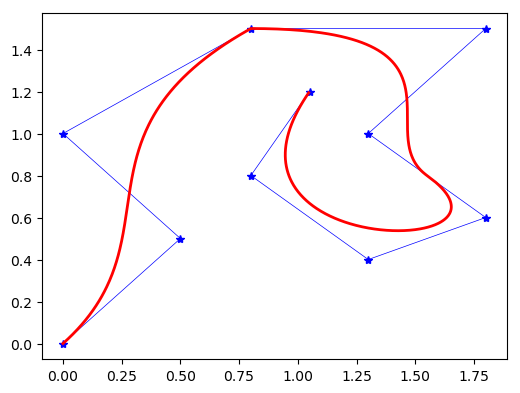

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd72dc34d30>

In [92]:
#using PyPlot
#plt = PyPlot

let
    # The spatial dimension
    dim_s = 2
    # The degree
    p = 3
    # The knot vector
    knotv = Array{Float64}([ 0 0 0 1 1 1 2 2 3 4 4 4 ])

    # The control points
    P = Array{Float64,2}([
            0.0 0.5 0.0 0.8 1.8 1.3 1.8 1.3 0.8 1.05
            0.0 0.5 1.0 1.5 1.5 1.0 0.6 0.4 0.8 1.2 ])

    X,t = draw_b_spline_curve( p, knotv, P, 200 )

    # Draw the curve
    figure_size = (6, 4.5)
    plt.figure(figsize=figure_size)
    plt.plot(P[1,:],P[2,:],"-*",color="b",linewidth=0.5)
    plt.plot(X[1,:],X[2,:],"-",color="r",linewidth=2)
end

# Using the greville abscissae to recover the B-spline basis

Given a set of B-spline basis functions, the *greville abscissae* are the coefficients which result in a linear parameterization.  In other words, when the control points are placed on the x-axis at the positions of the greville abscissae, then the "speed" that the B-spline is drawn (relative to the parameter $t$) is constant.  The greville abscissae can be computed from the knot vector by averaging the knots that make up the polar coordinate of each control point.

Let's do an example.  Given a cubic ($p=3$) B-spline with the knot vector $0 0 0 1 1 1 2 2 3 4 4 4$, the greville abscissae are

(0 + 0 + 0)/3 = 0

(0 + 0 + 1)/3 = 1/3

(0 + 1 + 1)/3 = 2/3

(1 + 1 + 1)/3 = 1

(1 + 1 + 2)/3 = 4/3

(1 + 2 + 2)/3 = 5/3

(2 + 2 + 3)/3 = 7/3

(2 + 3 + 4)/3 = 3

(3 + 4 + 4)/3 = 11/3

(4 + 4 + 4)/3 = 4

If we place the control points on the x-axis at the greville abscissae, and then place the y-coordinate of all the control points to $y=0$ except for one (which we set to $y=1$), then the B-spline curve will be identical to the B-spline basis function associated with the control point at $y=1$.

This may seem obvious to some readers, but to others it's a good thing to highlight, to help show how B-splines work.

In [93]:
"""
function greville_abscissae_from_knot_vector(
                                    p::Int64,
                                    knot_v::Array{Float64} )::Array{Float64}
============================
# Parameters
* p: The degree of the B-spline
* knot_v: The knot vector (length n+p-1, where n is the number of control points)

# Returns
* Array containing the greville abscissae value for each control point.
"""
function greville_abscissae_from_knot_vector(
                                    p::Int64,
                                    knot_v::Array{Float64} )::Array{Float64}
    n = (length(knot_v)-p+1)
    GA = zeros(n)
    for i = 1:(length(knot_v)-p+1)
        for j = 1:p
            GA[i] += knot_v[i+j-1]
        end
        GA[i] /= p
    end
    return GA
end

greville_abscissae_from_knot_vector

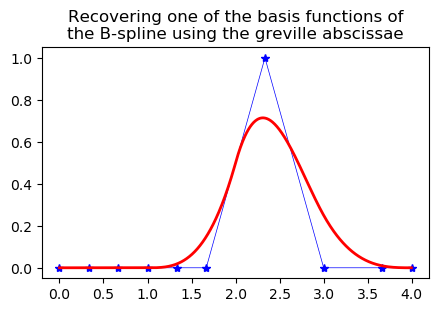

PyObject Text(0.5, 1.0, 'Recovering one of the basis functions of\nthe B-spline using the greville abscissae')

In [94]:
#using PyPlot
#plt = PyPlot

let
    # The spatial dimension
    dim_s = 2
    # The degree
    p = 3
    # The knot vector
    knotv = Array{Float64}([ 0 0 0 1 1 1 2 2 3 4 4 4 ])

    # The control points
    P = zeros(2,length(knotv)-p+1)
    P[1,:] = greville_abscissae_from_knot_vector(p,knotv)

    # We select the control point whose basis function we will recover
    P[2,7] = 1.0

    X,t = draw_b_spline_curve( p, knotv, P, 200 )

    # Draw the curve
    figure_size = (5, 3)
    plt.figure(figsize=figure_size)
    plt.plot(P[1,:],P[2,:],"-*",color="b",linewidth=0.5)
    plt.plot(X[1,:],X[2,:],"-",color="r",linewidth=2)
    plt.title("Recovering one of the basis functions of\nthe B-spline using the greville abscissae")
end

┌ Info: Saved animation to 
│   fn = /Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_b_spline_recover_basis_greville_abscissae_00.gif
└ @ Plots /Users/stevenschmidt/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_b_spline_recover_basis_greville_abscissae_00.gif")
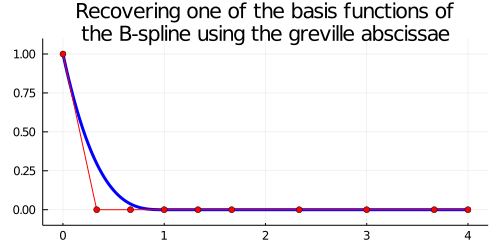

In [95]:
let
    # The spatial dimension
    dim_s = 2
    # The degree
    p = 3
    # The knot vector
    knotv = Array{Float64}([ 0 0 0 1 1 1 2 2 3 4 4 4 ])

    # The control points
    P = zeros(2,length(knotv)-p+1)
    P[1,:] = greville_abscissae_from_knot_vector(p,knotv)
    
    anim = Animation()
    for i = 1:(length(knotv)-p+1)

        # We select the control point whose basis function we will recover
        P = zeros(2,length(knotv)-p+1)
        P[1,:] = greville_abscissae_from_knot_vector(p,knotv)
        P[2,i] = 1.0

        X,t = draw_b_spline_curve( p, knotv, P, 200 )

        # Plot the curve
        Plots.default(overwrite_figure=true)
        plt_size = (500,250)
        fig = Plots.plot(
            xlims = (-0.2, 4.2),
            ylims = (-0.1, 1.1),
            size = plt_size,
            title = "Recovering one of the basis functions of\nthe B-spline using the greville abscissae",
        )

        Plots.plot!( fig, X[1,:], X[2,:], leg = false,
            lw=3, linecolor=:blue )

        # Plot the control points.
        Plots.plot!( fig, P[1,:], P[2,:], leg = false,
            lw=1, linecolor=:red )
        Plots.scatter!( fig, P[1,:], P[2,:], leg = false,
            markersize=4, markercolor=:red )

        frame(anim)
    end
    gif(anim, "fig_b_spline_recover_basis_greville_abscissae_00.gif", fps = 2)
end

# Knot insertion, and recovering the Bezier curves that make up the B-spline

As we described above, a B-spline is in fact a connected sequence of Bezier curves.  However, the control points of a B-spline do not in general correspond to the control points of the underlying Bezier curves.  To recover the control points of the underlying Bezier curves, a process known as *knot insertion* can be carried out to convert the B-spline into a form where the control points are the same as the underlying Bezier curves.

Also as described above, the multiplicity of a knot in the knot vector is related to the continuity enforced by the B-spline basis functions at the interfaces between Bezier curves.  In order to recover the underlying Bezier curves (and their control points), we must add knots to the knot vector so that the enforced continuity between each Bezier curve is $C^0$.

We will demonstrate how this is to be done.

## Notes about Polar Coordinates

There is something about how polar coordinates work that is important to understand, and will make the *knot insertion* idea much easier to understand.

As was stated before, *polar coordinates* are labels on each control point that are made up of $p$ consecutive knots from the knot vector.  These values are incredibly useful in identifying the locations of new control points for a refined B-spline after a new knot vector has been constructed. 

Suppose we are given a knot vector
$$
    000123444
$$
Then, two of the consecutive control points are labeled $123$ and $234$. 

If we draw a line between these two control points, there is a way to determine the location of a new control point with a polar label $x23$  (or, $2x3$; or, $23x$) for any value of $1 \le x \le 4$.  We do this by recognizing that the knot values $2$ and $3$ are common between $123$ and $234$, and thus will hold these values constant; but the remaining values $1$ in the first polar coordinate and $4$ in the second polar coordinate are the endpoint values of the range of values that the variable $x$ can take.

The easiest way to explain this is to show you with an animation.  See the Julia code below, and the animation following.

┌ Info: Saved animation to 
│   fn = /Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_polar_coordinates_example_00.gif
└ @ Plots /Users/stevenschmidt/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_polar_coordinates_example_00.gif")
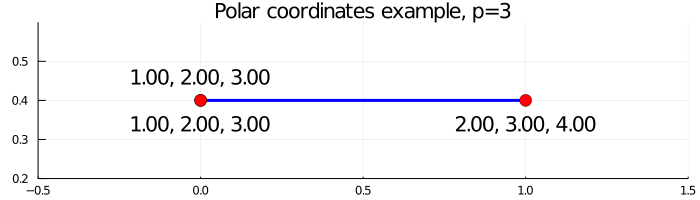

In [96]:
let
    # Linear bezier curve to draw the line.
    P = Array{Float64,2}([ 0.0 1.0
                           0.4 0.4 ])
    X,t = draw_bezier_curve( P, 200 )
    
    # The animation covers 'npts' points
    npts = 151
    X2,t2 = draw_bezier_curve( P, npts-1 )

    # The value of the third knot in the polar coordinate
    knotpts = collect(range(1,stop=4,length=npts))
    
    # We're going between polar coordinates 123 and 234.
    #000123444
    
    # Collecting the indices that the animation loops through
    start_arr = ones(Int64,convert(Int64,floor(npts/15)))
    end_arr = npts.*ones(Int64,2*convert(Int64,floor(npts/15)))
    vals_up = Array{Int64}(collect(1:npts)[:])
    vals_down = Array{Int64}(collect(npts:-1:1)[:])
    vals = cat(start_arr, vals_up, end_arr, vals_down, start_arr,dims=(1))[:]

    anim = Animation()
    for i = 1:length(vals)
        animate_i = vals[i]
    
        # Create the polar coordinates
        polcoord1 = Array{Float64}([1, 2, 3])
        polcoord2 = Array{Float64}([2, 3, 4])
        polcoord3 = Array{Float64}([2, 3, knotpts[animate_i]])

        #Sort the polar coordinates from smallest to largest
        sort!(polcoord1)
        sort!(polcoord2)
        sort!(polcoord3)

        Plots.default(overwrite_figure=true)
        plt_size = (700,200)
        fig = Plots.plot(
            xlims = (-0.5, 1.5),
            ylims = (0.2, 0.6),
            size = plt_size,
            title = "Polar coordinates example, p=3",
        )

        Plots.plot!( fig, X[1,:], X[2,:], leg = false,
            lw=3, linecolor=:blue )

        # Plot the control points.
        Plots.scatter!( fig, P[1,:], P[2,:], leg = false,
            markersize=7, markercolor=:red )
        Plots.scatter!( fig, X2[1,animate_i:animate_i], X2[2,animate_i:animate_i], leg = false,
            markersize=7, markercolor=:red )

        xshift1 = 0.0
        yshift1 = -0.06

        xshift2 = 0.0
        yshift2 = -0.06

        xshift3 = 0.0
        yshift3 = 0.06
        
        label1 = rpad(polcoord1[1],4,"0")*", "*rpad(polcoord1[2],4,"0")*", "*rpad(polcoord1[3],4,"0")
        label2 = rpad(polcoord2[1],4,"0")*", "*rpad(polcoord2[2],4,"0")*", "*rpad(polcoord2[3],4,"0")
        label3 = rpad(polcoord3[1],4,"0")*", "*rpad(polcoord3[2],4,"0")*", "*rpad(polcoord3[3],4,"0")

        annotate!(
            [
                (P[1,1]+xshift1, P[2,1]+yshift1, Plots.text(label1, :center, 14, "monaco")),
                (P[1,2]+xshift2, P[2,2]+yshift2, Plots.text(label2, :center, 14, "monaco")),
                (X2[1,animate_i]+xshift3, X2[2,animate_i]+yshift3, Plots.text(label3, :center, 14, "monaco"))
            ])
        frame(anim)
    end
    gif(anim, "fig_polar_coordinates_example_00.gif", fps = 24)
    
end

## Knot Insertion

Let's do this with a few examples.

### Linear ($p=1$)

Given a linear ($p=1$) B-spline with a knot vector
$$
    \boldsymbol{k}_\text{old} = a c
$$
for $a<c$, there are two control points with polar coordinates $a$ and $c$, and values
$$
    \boldsymbol{P}_\text{old} = \begin{bmatrix} x_a & x_c \end{bmatrix}
$$
If we add a knot $b$ where $a<b<c$, so the new knot vector is
$$
    \boldsymbol{k}_\text{new} = a b c
$$
then the new control points would have polar coordinates $a$, $b$, and $c$, and values
$$
    \boldsymbol{P}_\text{new} = \begin{bmatrix} x_a & x_b & x_c \end{bmatrix}
$$
The value of the new control point $x_b$ is determined by first computing a ratio $\alpha$
$$
    \alpha = (b-a)/(c-a)
$$
and then the new control point is
$$
    x_b = (1-\alpha) x_a +  \alpha x_c
$$

We can do this with actual numbers.  Suppose the knot vector is
$$
    \boldsymbol{k}_\text{old} = 0 4
$$
The polar coordinates initially are $0$ and $4$, and the control points have values
$$
    \boldsymbol{P}_\text{old} = \begin{bmatrix} 0 & 1 \end{bmatrix}
$$
Then, we add a new knot $1$, to the knot vector, to get
$$
    \boldsymbol{k}_\text{new} = 0 1 4
$$ 
Next, we compute $\alpha$
$$
    \alpha = (1-0)/(4-0) = 0.25
$$
so the new control points are
$$
    x_b = (1-\alpha) x_a +  \alpha x_c = (1-0.25) * 0 + 0.25 * 1 = 0.25
$$
$$
    \boldsymbol{P}_\text{new} = \begin{bmatrix} 0 & 0.25 & 1 \end{bmatrix}
$$

### Quadratic ($p=2$)

Given a quadratic ($p=2$) B-spline with a knot vector
$$
    \boldsymbol{k}_\text{old} = a a c c
$$
for $a<c$, there are three control points with polar coordinates $aa$, $ac$, and $cc$, and values
$$
    \boldsymbol{P}_\text{old} = \begin{bmatrix} x_{aa} & x_{ac} & x_{cc} \end{bmatrix}
$$
If we add a knot $b$ where $a<b<c$, so the new knot vector is
$$
    \boldsymbol{k}_\text{new} = a a b c c
$$
then the new control points would have polar coordinates $aa$, $ab$, $bc$, and $cc$, and values
$$
   \boldsymbol{P}_\text{new} = \begin{bmatrix} x_{aa} & x_{ab} & x_{bc} & x_{cc} \end{bmatrix}
$$
By adding the knot, the control point $x_{ac}$ is replaced with two new control points $x_{ab}$ and $x_{bc}$. The values of the new control points are computed as linear combinations of the nearest control points from before the knot insertion:
$$
    \alpha = (b-a)/(c-a)  \hspace{10mm}  x_{ab} = (1-\alpha) x_{aa} + \alpha x_{ac}
$$
$$
    \alpha = (b-a)/(c-a)  \hspace{10mm}  x_{ab} = (1-\alpha) x_{ac} + \alpha x_{cc}
$$

### Cubic ($p=3$)

Given a cubic ($p=3$) B-spline with a knot vector
$$
    \boldsymbol{k}_\text{old} = a a a b d e e e
$$
for $a<b<d<e$, there are six control points with polar coordinates $aaa$, $aab$, $abd$, $bde$, $dee$, and $eee$.
$$
    \boldsymbol{P}_\text{old} = \begin{bmatrix} x_{aaa} & x_{aab} & x_{abd} & x_{bde} & x_{dee} & x_{eee} \end{bmatrix}
$$
If we add a knot $c$ where $a<b<c<d<e$, so the new knot vector is
$$
    \boldsymbol{k}_\text{new} = a a a b c d e e e
$$
then the new control points would have polar coordinates $aaa$, $aab$, $abc$, $bcd$, $cde$, $dee$, and $eee$, and values
$$
    \boldsymbol{P}_\text{new} = \begin{bmatrix} x_{aaa} & x_{aab} & x_{abc} & x_{bcd} & x_{cde} & x_{dee} & x_{eee} \end{bmatrix}
$$
By adding the knot, the control points $x_{abd}$ and $x_{bde}$ are replaced with three new control points $x_{abc}$, $x_{bcd}$, and $x_{cde}$. The values of the new control points are computed as linear combinations of the nearest control points from before the knot insertion:
$$
    \alpha = (c-a)/(d-a)  \hspace{10mm}  x_{abc} = (1-\alpha) x_{aab} + \alpha x_{abd}
$$
$$
    \alpha = (c-a)/(e-a)  \hspace{10mm}  x_{bcd} = (1-\alpha) x_{abd} + \alpha x_{bde}
$$
$$
    \alpha = (c-b)/(e-b)  \hspace{10mm}  x_{cde} = (1-\alpha) x_{bde} + \alpha x_{dee}
$$

### General formula

Given a B-spline of degree $p$ and knot vector
$$
    \boldsymbol{k}_\text{old} = k_1 k_2 k_3 ... k_{n+p-1}
$$
where $k_i < k_{i+1}$, $i \in [1,{n+p-1}]$; there are $n$ control points with polar coordinates $k_i k_{i+1} k_{i+2} ... k_{i+p-1}$, $i \in [1,n]$, and values
$$
    \boldsymbol{P}_\text{old} = \begin{bmatrix} x_{k_1 k_2 k_3 ... k_{p}} &  x_{k_2 k_3 k_4 ... k_{p+1}} & ... & x_{k_{n} k_{n+1} k_{n+2} ... k_{n+p-1}} \end{bmatrix}
$$
These control points may also be indexed $x_i$ for $i\in[1,n]$.
$$
    \boldsymbol{P}_\text{old} = \begin{bmatrix} x_{1} &  x_{2} & ... & x_{n} \end{bmatrix}
$$

If we add the knot $\hat{\kappa}$ where $k_i < \hat{\kappa} < k_{i+1}$, but re-index the new knot vector so that
$$
    \kappa_1 = k_1, \hspace{4mm}
    \kappa_2 = k_2, \hspace{4mm}
    ..., \hspace{4mm}
    \kappa_{j-1} = k_i, \hspace{4mm}
    \kappa_{j} = \hat{\kappa}, \hspace{4mm}
    \kappa_{j+1} = k_{i+1}, \hspace{4mm}
    ..., \hspace{4mm}
    \kappa_{n+p} = k_{n+p-1}
$$

Then, the new knot vector is
$$
    \boldsymbol{k}_\text{new} = \kappa_1 \kappa_2 \kappa_3 ... \kappa_j ... \kappa_{n+p}
$$


The new control points would have polar coordinates cooresponding to each combination of $p$ consecutive knots, including the new knot $\hat{\kappa}$, for a total of $n+1$ control points.
$$
    \boldsymbol{P}_\text{new} = \begin{bmatrix} \xi_{1} &  \xi_{2} & ... & \xi_{n+1} \end{bmatrix}
$$

By adding the knot, there are $p-1$ control points from $\boldsymbol{P}_\text{old}$ which are replaced in $\boldsymbol{P}_\text{new}$ with $p$ new control points whose polar coordinates include the knot $\hat{\kappa}$. For each, the values of the new control points are computed as

$$
    \alpha = \frac{\hat{\kappa} - \kappa_{i-1}}{\kappa_{i+p-1}-k_{i-1}}
$$

$$
    \xi_{i} =  (1-\alpha) x_{i-1} + \alpha x_i \text{ for } i \in [j-p+1,j]
$$

and all other control points are equal to the corresponding previous control points

$$
    \xi_{i} =  x_{i} \text{ for } i \in [1,j-p]
$$

$$
    \xi_{i} =  x_{i-1} \text{ for } i \in [j+1,n+1]
$$

Let's see how this looks in a Julia function.

In [97]:
"""
function insert_knot(
                    new_knot::Float64,
                    p::Int64,
                    knot_v::Array{Float64},
                    control_pts::Array{Float64,2} )::Tuple(Array{Float64},Array{Float64})
======
This function is for B-splines.

# Parameters:
* new_knot: The new knot to be inserted
* p: The polynomial degree of the curve
* knot_v: The old knot vector
* control_pts: The control points of the old spline
     (dimension d-by-n, for spatial dimenion d and for n control points)

# Returns
* new_knot_v,new_control_pts
"""
function insert_knot(
                    new_knot::Float64,
                    p::Int64,
                    knot_v::Array{Float64},
                    control_pts::Array{Float64,2} )::Tuple{Array{Float64},Array{Float64}}

    # Init the new knot vector
    new_knot_v = zeros(length(knot_v)+1)

    # Insert the new knot into the knot vector,
    # and determine the index of the new knot.
    new_knot_i = (()->begin
        old_i = 1
        new_i = 1
        new_knot_i = -1
        knot_added = false
        while( old_i <= length(knot_v) )
            new_knot_v[new_i] = knot_v[old_i]
            if( knot_added == false &&
                            new_knot >= knot_v[old_i] &&
                            old_i < length(knot_v) &&
                            new_knot <= knot_v[old_i+1] )
                new_i += 1
                new_knot_v[new_i] = new_knot
                new_knot_i = new_i
                knot_added = true
            end
            old_i += 1
            new_i += 1
        end
        return new_knot_i
    end)()

    # The dimension of the control points array.
    cp_arr_dim = (()->begin
        if(length(size(control_pts)) == 1)
            return 1
        else
            return 2
        end
    end)()
    
    # The sizes of the old and new control points arrays
    # n: old control-pts array length
    # m: new control-pts array length (equals n+1)
    n, m = (()->begin
        n = nothing
        if( cp_arr_dim == 1 )
            n = length(control_pts)
        else
            n = size(control_pts)[2]
        end
        return n,n+1
    end)()
    
    # Init the new control points array
    new_control_pts = (()->begin
        new_control_pts = nothing
        if( cp_arr_dim == 1 )
            new_control_pts = Array{Float64}(m)
        else
            new_control_pts = Array{Float64}(undef,size(control_pts)[1],m)
        end
        return new_control_pts
    end)()

    # Fill in the new control points array
    # Iterate over each index of the new control points
    k = new_knot_i
    for i = 1:m
        # Determine alpha
        alpha = (()->begin
            alpha = nothing
            if( i >= 1 && i <= k-p )
                alpha = 1.
            elseif( i >= k-p+1 && i <= k )
                numerator = (new_knot - knot_at_index(knot_v,i-1))
                denominator = (knot_at_index(knot_v,i+p-1) - knot_at_index(knot_v,i-1))
                alpha = numerator / denominator
                if( denominator == 0 )
                    println("ERROR!! denominator is zero!")
                end
            else
                alpha = 0.
            end
            return alpha
        end)()

        # Determine the new points
        if( i == 1 )
            new_control_pts[:,i] = control_pts[:,i]
        elseif( i >= 1 && i < m )
            new_control_pts[:,i] = (1.0-alpha)*control_pts[:,i-1] + alpha*control_pts[:,i] 
        elseif( i >= m )
            new_control_pts[:,i] = control_pts[:,n]
        end
    end

    # Return the results
    return new_knot_v,new_control_pts
end

insert_knot

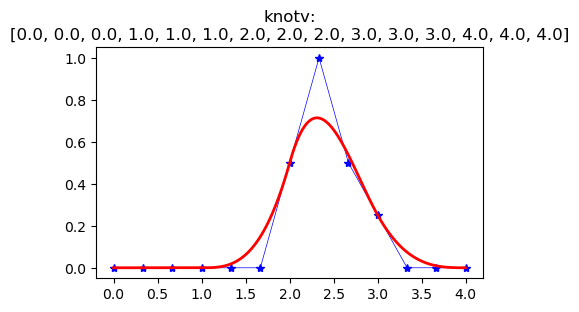

PyObject Text(0.5, 1.0, 'knotv:\n[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0]')

In [98]:
#using PyPlot
#plt = PyPlot

let
    # The spatial dimension
    dim_s = 2
    # The degree
    p = 3
    # The knot vector
    old_knotv = Array{Float64}([ 0 0 0 1 1 1 2 2 3 4 4 4 ])


    # The control points
    old_P = zeros(2,length(old_knotv)-p+1)
    old_P[1,:] = greville_abscissae_from_knot_vector(p,old_knotv)
    old_P[2,7] = 1.0

    old_knotv,old_P = insert_knot( 2., p, old_knotv, old_P )
    old_knotv,old_P = insert_knot( 3., p, old_knotv, old_P )
    knotv,P = insert_knot( 3., p, old_knotv, old_P )
    #knotv = old_knotv
    #P = old_P

    X,t = draw_b_spline_curve( p, knotv, P, 200 )

    # Draw the curve
    figure_size = (5, 3)
    plt.figure(figsize=figure_size)
    plt.plot(P[1,:],P[2,:],"-*",color="b",linewidth=0.5)
    plt.plot(X[1,:],X[2,:],"-",color="r",linewidth=2)
    plt.title("knotv:\n"*string(knotv))
end

We can see in the next example how the knot insertion algorithm is a way to recover the position of the curve at any point $t$ in the B-spline.

┌ Info: Saved animation to 
│   fn = /Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_knotinsert_draw_b_spline_00.gif
└ @ Plots /Users/stevenschmidt/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_knotinsert_draw_b_spline_00.gif")
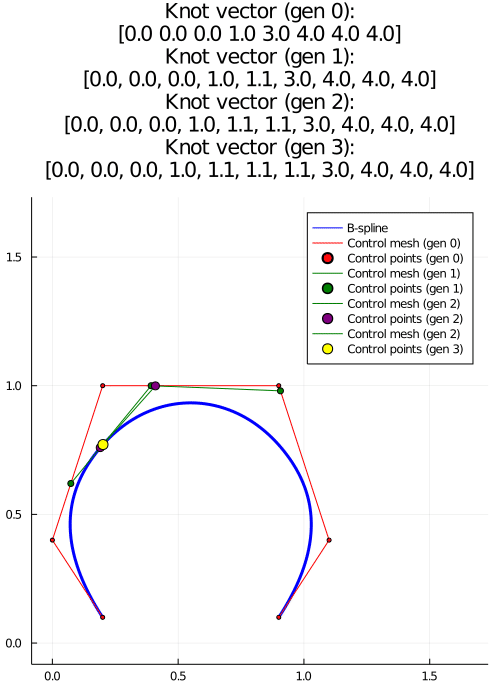

In [99]:
let
    # The spatial dimension
    dim_s = 2
    # The degree
    p = 3
    # The knot vector
    knotv0 = Array{Float64}([ 0 0 0 1 3 4 4 4 ])

    # The control points
    P0 = Array{Float64,2}([
            0.2 0.0 0.2 0.9 1.1 0.9 
            0.1 0.4 1.0 1.0 0.4 0.1 ])

    X0,t0 = draw_b_spline_curve( p, knotv0, P0, 200 )

    anim = Animation()
    for newknot_x in 1.1:0.1:2.9
        knotv1,P1 = insert_knot( newknot_x, p, knotv0, P0 )
        #X1,t1 = draw_b_spline_curve( p, knotv1, P1, 200 )

        knotv2,P2 = insert_knot( newknot_x, p, knotv1, P1 )
        #X2,t2 = draw_b_spline_curve( p, knotv2, P2, 200 )

        knotv3,P3 = insert_knot( newknot_x, p, knotv2, P2 )
        #X3,t3 = draw_b_spline_curve( p, knotv3, P3, 200 )

        # Determine the min and max of the area to be plotted.
        pxmin = 0.0
        pxmax = maximum(P0[1,:])
        pymin = 0.0
        pymax = maximum(P0[2,:])
        pxmax = pxmin + 1.5*max(pxmax-pxmin,pymax-pymin)
        pymax = pymin + max(pxmax-pxmin,pymax-pymin)
        offsetx = (pxmax-pxmin)*0.05
        offsety = (pxmax-pxmin)*0.05
        plotxmin = pxmin - offsetx
        plotxmax = pxmax + offsetx
        plotymin = pymin - offsety
        plotymax = pymax + offsety

        # Plot the curve
        Plots.default(overwrite_figure=true)
        plt_size = (500,700)
        fig = Plots.plot(
            xlims = (plotxmin, plotxmax),
            ylims = (plotymin, plotymax),
            size = plt_size,
            title = "Knot vector (gen 0):\n"*string(knotv0) * 
                    "\nKnot vector (gen 1):\n"*string(knotv1) *
                    "\nKnot vector (gen 2):\n"*string(knotv2) *
                    "\nKnot vector (gen 3):\n"*string(knotv3)
        )

        Plots.plot!( fig, X0[1,:], X0[2,:], leg = true,
            lw=3, linecolor=:blue, label = "B-spline" )

        # Plot the control points.
        Plots.plot!( fig, P0[1,:], P0[2,:], leg = true,
            lw=1, linecolor=:red, label = "Control mesh (gen 0)" )
        Plots.scatter!( fig, P0[1,:], P0[2,:], leg = true,
            markersize=3, markercolor=:red, label = "Control points (gen 0)" )

        #     # Plot the new curve
        #     Plots.plot!( fig, new_X[1,:], new_X[2,:], leg = true,
        #         lw=4, linecolor=:orange, label = "New B-spline" )

        # Plot the new control points, after the knot insertion
        Plots.plot!( fig, P1[1,3:5], P1[2,3:5], leg = true,
            lw=1, linecolor=:green, label = "Control mesh (gen 1)"  )
        Plots.scatter!( fig, P1[1,3:5], P1[2,3:5], leg = true,
            markersize=4, markercolor=:green, label = "Control points (gen 1)" )

        # Plot the new control points, after the knot insertion
        Plots.plot!( fig, P2[1,4:5], P2[2,4:5], leg = true,
            lw=1, linecolor=:green, label = "Control mesh (gen 2)"  )
        Plots.scatter!( fig, P2[1,4:5], P2[2,4:5], leg = true,
            markersize=5, markercolor=:purple, label = "Control points (gen 2)" )

        # Plot the new control points, after the knot insertion
        Plots.plot!( fig, P3[1,5:5], P3[2,5:5], leg = true,
            lw=1, linecolor=:green, label = "Control mesh (gen 2)"  )
        Plots.scatter!( fig, P3[1,5:5], P3[2,5:5], leg = true,
            markersize=6, markercolor=:yellow, label = "Control points (gen 3)" )
        
        frame(anim)
    end
    gif(anim, "fig_knotinsert_draw_b_spline_00.gif", fps = 3)
end

## Recovering the Bezier curves that make up the B-splines (Bezier Extraction)

If we use knot insertion to add additional knots until each knot has a multiplicity of $m = p$, then the resulting B-spline has a continuity of $C^0$ between each of the Bezier curves.  This effectively decomposes the B-spline into the original Beizer curves, with the same control points as the Bezier curves by themselves.  This process is referred to as *bezier extraction*.

The process of extracting the Bezier curves is simple: Perform the knot-insertion algorithm over and over until each knot is repeated $p$ times.


┌ Info: Saved animation to 
│   fn = /Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_extract_bezier_curves_00.gif
└ @ Plots /Users/stevenschmidt/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_extract_bezier_curves_00.gif")
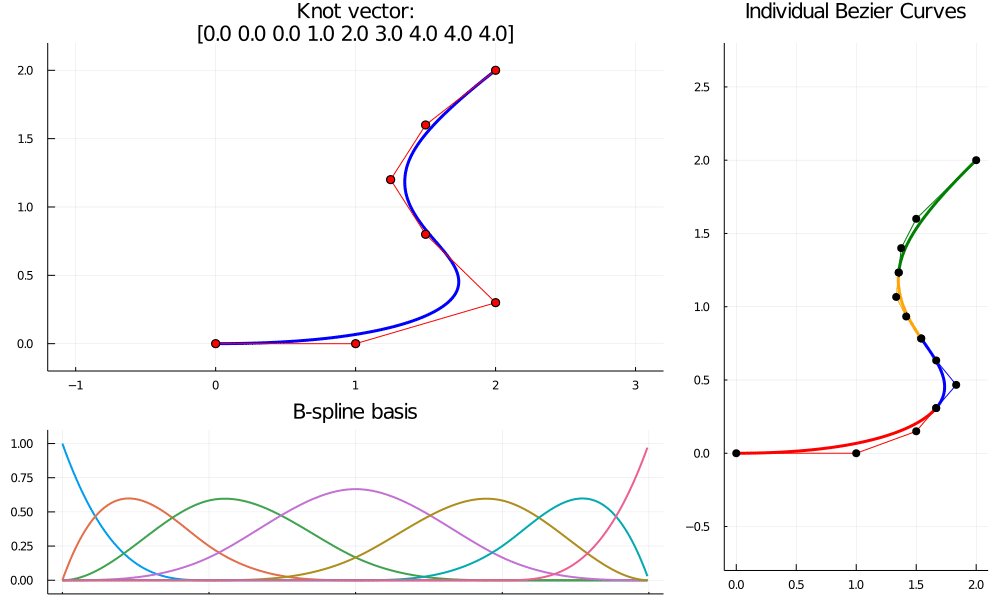

In [100]:
let
    # The spatial dimension
    dim_s = 2
    # The degree
    p = 3
    # The knot vector
    knotv0 = Array{Float64}([ 0 0 0 1 2 3 4 4 4 ])

    # The control points
    P0 = Array{Float64,2}([
            0.0 1.0 2.0 1.5 1.25 1.5 2.0 
            0.0 0.0 0.3 0.8 1.20 1.6 2.0 ])

    # The first knot is 'nothing' so in the first
    # iteration of the animation, we will just plot
    # the original B-spline
    newknotslist = Array{Any}([nothing 1. 1. 2. 2. 3. 3.])
    
    # Compute the final set of control points and knot-vector.
    knotv_final,P_final = (()->begin
        knotv_final = copy(knotv0)
        P_final = copy(P0)
        knotv_final,P_final = insert_knot( newknotslist[2], p, knotv_final, P_final )
        knotv_final,P_final = insert_knot( newknotslist[3], p, knotv_final, P_final )
        knotv_final,P_final = insert_knot( newknotslist[4], p, knotv_final, P_final )
        knotv_final,P_final = insert_knot( newknotslist[5], p, knotv_final, P_final )
        knotv_final,P_final = insert_knot( newknotslist[6], p, knotv_final, P_final )
        knotv_final,P_final = insert_knot( newknotslist[7], p, knotv_final, P_final )
        return knotv_final,P_final
    end)()

    # Draw the curve (the curve never changes)
    X0,t0 = draw_b_spline_curve( p, knotv0, P0, 200 )
 
    anim = Animation()
    for newknot_x in newknotslist
       
        # The first iteration doesn't add a knot (just plots the original control points)
        if( newknot_x != nothing )
            knotv0,P0 = insert_knot( newknot_x, p, knotv0, P0 )
        end
    
        plotlayout = @layout [
           [ a{0.7h} 
            b{0.35h} ] c{0.3w}
        ]

        # Plot the curve
        Plots.default(overwrite_figure=true)
        plt_size = (1000,600)
        fig = Plots.plot(
            size = plt_size,
            layout = plotlayout
        )

        # The min and max of the area to be plotted.
        pxmin = 0.0 - 1.0
        pxmax = maximum(P0[1,:]) + 1.0
        pymin = 0.0
        pymax = maximum(P0[2,:])
        offsetx = (pxmax-pxmin)*0.05
        offsety = (pxmax-pxmin)*0.05
        plotxmin = pxmin - offsetx
        plotxmax = pxmax + offsetx
        plotymin = pymin - offsety
        plotymax = pymax + offsety
        
        #Plot the first plot (the B-spline)
        Plots.plot!( fig, X0[1,:], X0[2,:], leg = false,
            xlims = (plotxmin, plotxmax),
            ylims = (plotymin, plotymax),
            title = "Knot vector:\n"*string(knotv0),
            lw=3, linecolor=:blue, subplot = 1 )
        Plots.plot!( fig, P0[1,:], P0[2,:], leg = false,
            lw=1, linecolor=:red, subplot = 1  )
        Plots.scatter!( fig, P0[1,:], P0[2,:], leg = false,
            markersize=5, markercolor=:red, subplot = 1 )

        # plot the second plot (the basis)
        h = 0.01
        t = collect(0:h:maximum(knotv0)-h)[:]
        N = zeros( length(knotv0)-p+1, length(t) )
        for j = 1:size(N)[1]
            for i = 1:length(t)
                N[j,i] = b_spline_basis(j,p,knotv0,t[i])
            end
        end
        for j = 1:size(N)[1]
            Plots.plot!( fig, t, N[j,:],
                    subplot = 2,
                    leg = false,
                    title = "B-spline basis",
                    xlims = (-0.1, maximum(knotv0)+0.1),
                    ylims = (-0.1, 1.1),
                    lw=2 )
        end
        
        # The min and max of the area to be plotted.
        pxmin = 0.0
        pxmax = maximum(P0[1,:])
        pymin = 0.0 - 0.7
        pymax = maximum(P0[2,:]) + 0.7
        offsetx = (pxmax-pxmin)*0.05
        offsety = (pxmax-pxmin)*0.05
        plotxmin = pxmin - offsetx
        plotxmax = pxmax + offsetx
        plotymin = pymin - offsety
        plotymax = pymax + offsety
        
        plotcolors = [:red,:blue,:orange,:green]
        
        # Plot the third plot (the individual Bezier curves)
        for i = 1:4
            bez_P = P_final[ :, ((p)*(i-1)+1):((p)*(i)+1) ]
            bez_X,bez_t = draw_bezier_curve( bez_P, 200 )
    
            #Plot the first plot (the B-spline)
            Plots.plot!( fig, bez_X[1,:], bez_X[2,:], leg = false,
                xlims = (plotxmin, plotxmax),
                ylims = (plotymin, plotymax),
                title = "Individual Bezier Curves",
                lw=3, linecolor=plotcolors[i], subplot = 3 )
            Plots.plot!( fig, bez_P[1,:], bez_P[2,:], leg = false,
                lw=1, linecolor=plotcolors[i], subplot = 3  )
            Plots.scatter!( fig, bez_P[1,:], bez_P[2,:], leg = false,
                markersize=5, markercolor=:black, subplot = 3 )
        end

        frame(anim)
    end
    gif(anim, "fig_extract_bezier_curves_00.gif", fps = 1)
end

# Building the *Bezier Extraction Operator* matrix, $C$

It is useful to obtain the coefficients which relate the B-spline basis to the Bernstein basis of each Bezier curve.  These coefficients are assembled into a matrix which is used as a linear operator, to transform a set of B-spline coefficients (or control points) into a set of Bernstein coefficients of one of the Bezier curves in the B-spline.

Suppose, for example, we had a cubic ($p=3$) B-spline with knot vector $k_1 k_1 k_1 k_2 k_3 k_4 k_5 k_5 k_5$.   This B-spline has seven control points, and is made up of four Bezier curves.  Let the B-spline control points be

$$
    P_\text{sp} = \begin{bmatrix}
        x_1 & x_2 & x_3 & x_4 & x_5 & x_6 & x_7 \\
        y_1 & y_2 & y_3 & y_4 & y_5 & y_6 & y_7 \\
    \end{bmatrix}
$$


Let the control points of the four extracted Bezier curves be
$$
    P^1_{\text{bz}} = \begin{bmatrix}
        \xi^1_1  & \xi^1_2 & \xi^1_3 & \xi^1_4 \\
        \eta^1_1 & \eta^1_2 & \eta^1_3 & \eta^1_4 \\
    \end{bmatrix}
$$

$$
    P^2_{\text{bz}} = \begin{bmatrix}
        \xi^1_2  & \xi^2_2 & \xi^2_3 & \xi^2_4 \\
        \eta^1_2 & \eta^2_2 & \eta^2_3 & \eta^2_4 \\
    \end{bmatrix}
$$

$$
    P^3_{\text{bz}} = \begin{bmatrix}
        \xi^3_1  & \xi^3_2 & \xi^3_3 & \xi^3_4 \\
        \eta^3_1 & \eta^3_2 & \eta^3_3 & \eta^3_4 \\
    \end{bmatrix}
$$

$$
    P^4_{\text{bz}} = \begin{bmatrix}
        \xi^4_1  & \xi^4_2 & \xi^4_3 & \xi^4_4 \\
        \eta^4_1 & \eta^4_2 & \eta^4_3 & \eta^4_4 \\
    \end{bmatrix}
$$

In this example, then, the *Bezier Extraction Operator* $C^i$ would be a $4$-by-$4$ matrix such that
$$
    P^i_\text{bz} = P_\text{sp}[:,i:i+p] C^i
$$

or,

$$
    \begin{bmatrix}
        x_{i} & x_{i+1} & x_{i+2} & x_{i+3} \\
        y_{i} & y_{i+1} & y_{i+2} & y_{i+3} \\
    \end{bmatrix} \begin{bmatrix}
        c^i_{11} & c^i_{12} & c^i_{13} & c^i_{14} \\
        c^i_{21} & c^i_{22} & c^i_{23} & c^i_{24} \\
        c^i_{31} & c^i_{32} & c^i_{33} & c^i_{34} \\
        c^i_{41} & c^i_{42} & c^i_{43} & c^i_{44} \\
    \end{bmatrix} = \begin{bmatrix}
        \xi^i_1  & \xi^i_2 & \xi^i_3 & \xi^i_4 \\
        \eta^i_1 & \eta^i_2 & \eta^i_3 & \eta^i_4 \\
    \end{bmatrix}
$$

TODO:
(1) Make a picture of how the bezextop works against control points (circling the control points)
(2) Explain how to construct a bezier extraction operator from the B-spline control points.

Todo: Also explain the other direction, when you think of it in terms of the basis functions

$$
\begin{bmatrix}
        N_{i} \\
        N_{i+1} \\
        N_{i+2} \\
        N_{i+3} \\
    \end{bmatrix} = \begin{bmatrix}
        c^i_{11} & c^i_{12} & c^i_{13} & c^i_{14} \\
        c^i_{21} & c^i_{22} & c^i_{23} & c^i_{24} \\
        c^i_{31} & c^i_{32} & c^i_{33} & c^i_{34} \\
        c^i_{41} & c^i_{42} & c^i_{43} & c^i_{44} \\
    \end{bmatrix} \begin{bmatrix}
        B_{1} \\
        B_{2} \\
        B_{3} \\
        B_{4} \\
    \end{bmatrix}
$$